<a href="https://colab.research.google.com/github/cristianogoss/Projetos-Data-Science/blob/master/Titanic_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtenção dos Dados

Os dados utilizados nesse projeto foram obtidos do site ***kaggle.com***, sendo esta a maior plataforma para competição de cientistas de dados.

Como a maioria já conhece a história, O RMS Titanic foi um navio de passageiros britânico, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com **2224 pessoas a bordo, e seu naufrágio matou 1524 passageiros** , sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época




In [13]:
# Autorizando o carregamento do arquivo que vamos trabalhar diretamente do google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Utilizaremos as bibliotecas do pandas,  onde criaremos DataFrames para visualizarmos nossos dados e trabalhar nosso código

In [0]:
#importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Carregando as nossa base dados e armazenando na variável "jack"

jack = pd.read_csv('/content/drive/My Drive/datasets/titanic/train.csv')
jack.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# visualizando as colunas da base de dados
jack.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# excluindo as colunas que a princípio não serão relevantes em nossa análise

jack.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
jack.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [18]:
# renomeando as colunas do dataset para um melhor entedimento

jack.columns = ['Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade', 'Irmãos/Crianças', 'Pais/Filhos', 'Tarifa', 'Embarque']
jack.head()

,Sobrevivente,Classe,Nome,Sexo,Idade,Irmãos/Crianças,Pais/Filhos,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Passageiros e Tripulação:

 O Titanic partiu em sua primeira e única viagem com 2224 pessoas (tripulação e  passageiros) a bordo: 325 na primeira classe, 285 na segunda e 706 na terceira. Os embarques foram em : ***Southampton - Inglaterra, em Cherbourg-Octeville na França e em Queenstown na Irlanda***. Na primeira classe estavam os passageiros mais ricos do navio, dentre eles empresários, artistas, oficiais militares, políticos e outros. A segunda classe era mais diversificada e incluía empresários, professores, clérigos e imigrantes, por vezes ricos, que retornavam ao seu país natal. Por fim, a terceira classe era onde estavam os imigrantes. Eram pessoas que muitas vezes viajavam em grandes grupos familiares de até doze membros. Eles vinham de diferentes partes da Europa como Escandinávia, Leste Europeu, Irlanda e até mesmo da Ásia


In [0]:
# substituindo  o conteúdo da coluna "embarque" com iniciais(S, Q, C) pelas cidades correspondentes

jack["Embarque"] = jack['Embarque'].replace(['S','Q','C'], ['Southampton', 'Queenstown','Cherbourg'])

In [0]:
# vamos substituir o "male, female" por "masculino e feminino"

jack['Sexo'] = jack['Sexo'].replace(['male', 'female'], ['masculino','feminino'])

In [21]:
# vendo as informações numéricas e categóricas do dataset

jack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Sobrevivente       891 non-null int64
Classe             891 non-null int64
Nome               891 non-null object
Sexo               891 non-null object
Idade              714 non-null float64
Irmãos/Crianças    891 non-null int64
Pais/Filhos        891 non-null int64
Tarifa             891 non-null float64
Embarque           889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [22]:
# visualizando as informações estatísticas

jack.describe()

,Sobrevivente,Classe,Idade,Irmãos/Crianças,Pais/Filhos,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# visualizando os valores faltantes 

jack.isnull().sum()

Sobrevivente         0
Classe               0
Nome                 0
Sexo                 0
Idade              177
Irmãos/Crianças      0
Pais/Filhos          0
Tarifa               0
Embarque             2
dtype: int64

In [0]:
# Substituindo pela média a coluna "idade", onde há vários valores faltantes

jack['Idade'].fillna(jack['Idade'].mean(), inplace=True)

In [25]:
jack.isnull().sum()

Sobrevivente       0
Classe             0
Nome               0
Sexo               0
Idade              0
Irmãos/Crianças    0
Pais/Filhos        0
Tarifa             0
Embarque           2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff079b20240>,
      dtype=object)

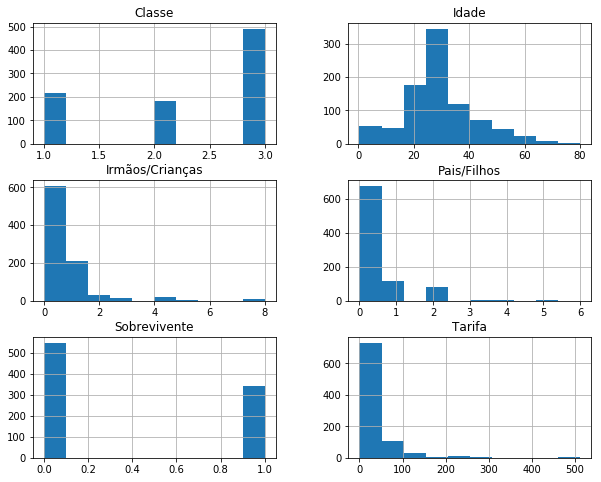

In [26]:
# histograma das variáveis numéricas

jack.hist(figsize=(10,8))

## Sobreviventes:

O número exato de mortos no naufrágio é incerto devido a vários fatores, como confusão sobre a lista de passageiros, que incluía nomes de pessoas que cancelaram a viagem no último momento e o fato de alguns passageiros terem embarcado sob pseudônimos. O número total de mortos já foi colocado entre 1490 e 1635 pessoas. O número mais aceito é aquele da Junta Comercial britânica, 1514 mortos
 
Neste arquivo contém apenas **891 entradas (nomes)**  de pessoas, e como podemos ver nos dados e gráficos abaixo, as mulheres foram os maiores sobreviventes, bem como os que estavam na **primeira Classe**, seguido da segunda e por último a terceira, sendo que esta situava-se nos porões do navio

Outro fato interessante, os sobreviventes em maior número embarcaram em **Cherbourg na França,** seriam dessa cidade os mais afortunados do navio?

In [27]:
# média de sobreviventes

jack[['Sexo', 'Sobrevivente']].groupby(['Sexo']).mean() 


,Sobrevivente
Sexo,
feminino,0.742038
masculino,0.188908


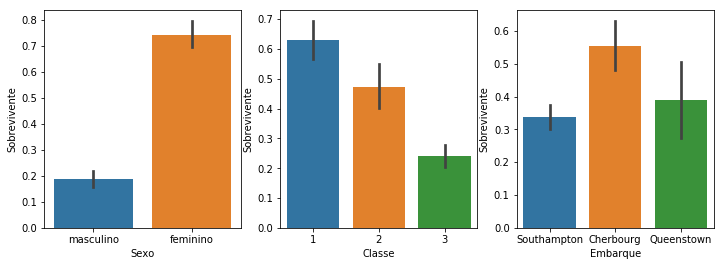

In [0]:
# plotando os gráficos para: sobrevivente vs. Sexo, Classe e Embarque

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sexo', y='Sobrevivente', data=jack, ax=axis1)
sns.barplot(x='Classe', y='Sobrevivente', data=jack, ax=axis2)
sns.barplot(x='Embarque', y='Sobrevivente', data=jack, ax=axis3)


## Prioridade

 Mulheres e crianças primeiro, é  um código de conduta datando de 1852, pelo qual as vidas de mulheres e crianças deveriam ser salvas primeiro em uma situação que ameaça a vida, geralmente abandonando o navio, quando os recursos de sobrevivência, como botes salva-vidas são limitados, o que foi o caso do **Titanic,** onde não haviam botes para todos, mas acreditem, o navio estava de acordo com as leis da época, onde a quantidade de barcos salva vidas estava de acordo com a tonelagem do mesmo


Vamos criar uma váriavel prioridade, onde armazenaremos apenas as crianças e mulheres

In [0]:
# criando a variável prioridade, com idades de "0 a 12" e o sexo feminino

prioridade = (jack['Idade'] <= 12) & (jack['Idade'] > 0) | (jack['Sexo'] == 'feminino')
prioridade = jack[prioridade]
prioridade.head()

,Sobrevivente,Classe,Nome,Sexo,Idade,Irmãos/Crianças,Pais/Filhos,Tarifa,Embarque
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,71.2833,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,7.9250,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,53.1000,Southampton
7,0,3,"Palsson, Master. Gosta Leonard",masculino,2.0,3,1,21.0750,Southampton
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",feminino,27.0,0,2,11.1333,Southampton


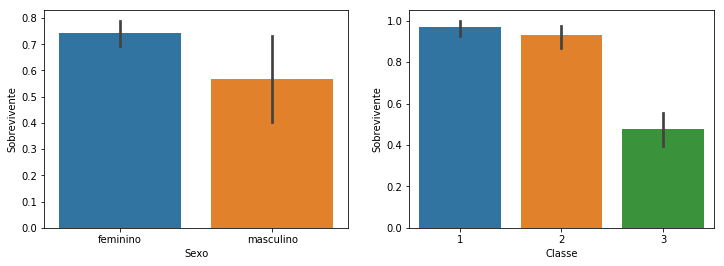

In [0]:
# plotando os gráficos para: sobrevivente vs. Sexo, Classe, levando em consideração a variável prioridade


fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x='Sexo', y='Sobrevivente', data=prioridade, ax=axis1)
sns.barplot(x='Classe', y='Sobrevivente', data=prioridade, ax=axis2)

## Resgate

Os sobreviventes do Titanic finalmente foram resgatados a partir dàs 4h00min da manhã do dia 15 de abril pelo Carpathia, que havia corrido durante a noite em máxima velocidade e a um risco considerável, já que ele teve de desviar de vários icebergs no caminho

Menos de um terço daqueles que estavam a bordo do Titanic sobreviveram. Alguns sobreviventes morreram pouco tempo depois; ferimentos e os efeitos da exposição causaram a morte de muitos daqueles resgatados pelo Carpathia. 49% das crianças, 26% das mulheres passageiras, 82% dos homens passageiros e 78% da tripulação morreram

O gráfico abaixo demonstra apenas quantidade de sobreviventes dos 891 passageiros catalogados, mas na verdade morreram muito mais

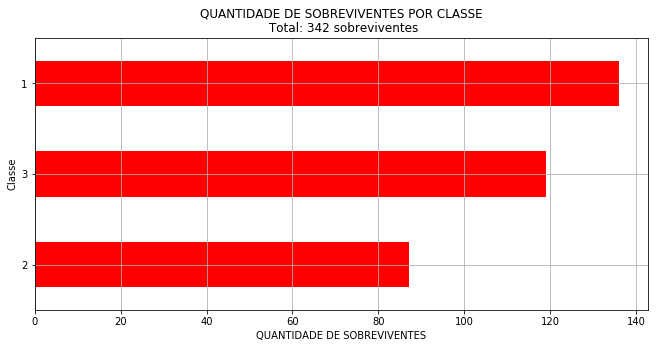

In [0]:
# plotando um gráfico da quantidade de sobreviventes cadastrados por classe

sobrevivente_classe = jack[jack['Sobrevivente'] == 1]['Classe'].value_counts().sort_values(ascending=True)
sobrevivente_classe.plot(kind='barh', figsize=(11,5), color = "red", rot=0, grid=True)

plt.title('QUANTIDADE DE SOBREVIVENTES POR CLASSE\n Total: %s sobreviventes' % (sobrevivente_classe.sum()))
plt.xlabel('QUANTIDADE DE SOBREVIVENTES')
plt.ylabel('Classe')
plt.show()

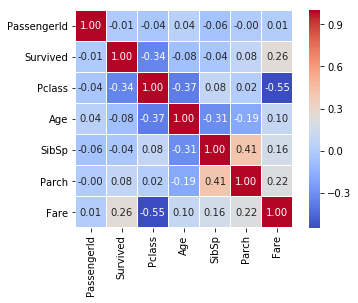

In [0]:
# plotar o heatmap para ver a correlação entre  os dados

sns.heatmap(jack.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);